# Single objective optimization
The goal of the example is to show solving single objective problem.  Let the goal function is given 
by expression
$$ 
    F(\boldsymbol{x}) = x_1^2
$$
and the task is find minimum of this function.
The parameter $x_1$ is a real number from an interval $x_1 \in \langle 0, 0.9 \rangle$, the initial value is $x_1(0) = 0.1$.

## Run optimization
The minimal code for  solving the task is listed bellow 

In [37]:
import pylab as pl

from artap.problem import Problem
from artap.results import Results
from artap.algorithm_scipy import ScipyOpt

class ArtapProblem(Problem):
    """
    The solution of this problem needs to find the minimum of a one parametered (x_1) goal function.
    The problem solved, by the Nelder-Mead method, therefore an initial value has to be defined, anyway it is set to 0.
    """

    def set(self):
        self.parameters = [{'name': 'x_1', 'initial_value': 0.1, 'bounds': [0.1, 0.9]}]
        self.costs = [{'name': 'F_1'}]

    def evaluate(self, individual):
        # The variable individual.vector contains vector of particular values of parameters
        x = individual.vector

        # the goal function
        F1 = x[0]**2

        # the evaluate function should give back a list of the calculated objective values, following the defined
        # order in set(Problem) in this case --> ['F1']
        return [F1]

# Optimization with Nelder-Mead
problem = ArtapProblem()

# set the optimization method
algorithm = ScipyOpt(problem)
algorithm.options['algorithm'] = 'Nelder-Mead'
algorithm.options['tol'] = 1e-3

# perform the optimization
algorithm.run()

2022-02-02 11:13:46,435 (INFO): ArtapProblem-434831 - run (32) - ScipyOpt: Nelder-Mead
2022-02-02 11:13:46,439 (INFO): ArtapProblem-434831 - run (37) - ScipyOpt: elapsed time: 0.0040721893310546875 s


## Process results
Provided the code above was run, the results are available through the `class Results`. The optimal value can be obtained by the code below.

In [38]:
results = Results(problem)
optimum = results.find_optimum(0)
print('The optimal value of the parameter:{}.'.format(optimum.vector[0]))
print('The optimal value of the goal function:{}.'.format(optimum.costs[0]))


The optimal value of the parameter:1.942890293094024e-16.
The optimal value of the goal function:3.774822690998982e-32.


---

`Class Results` offers a set of tools suporting a graphical interpretation of the optimization process. The dependence of the goal function on parameter can be obtained using code

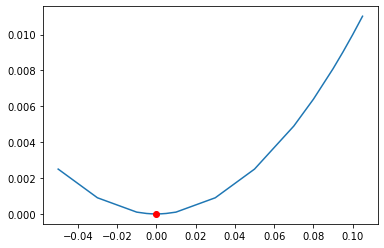

In [48]:
table = results.goal_on_parameter('x_1', 'F_1', sorted=True)
pl.plot(table [0], table[1])
pl.plot(optimum.vector[0], optimum.costs[0],'or')

The evolution of the goal function through the optimization process can be displayed as 

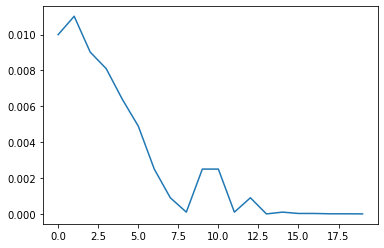

In [49]:
table = results.goal_on_index()
pl.plot(table[0], table[1])

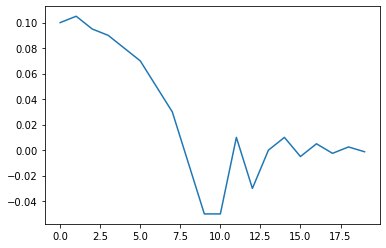

In [51]:
table = results.parameter_on_index()
pl.plot(table[0], table[1])

## Modifications

By default Artap solve the minimization task. For maximization it is necessary to add a key 'criteria' to the `costs` dictionary.

2022-02-02 12:25:49,079 (INFO): ArtapProblem-078111 - run (32) - ScipyOpt: Nelder-Mead
2022-02-02 12:25:49,083 (INFO): ArtapProblem-078111 - run (37) - ScipyOpt: elapsed time: 0.004320621490478516 s


The optimal value of the parameter:1.942890293094024e-16.
The optimal value of the goal function:1.0.


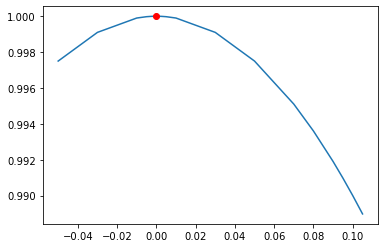

In [67]:
import pylab as pl

from artap.problem import Problem
from artap.results import Results
from artap.algorithm_scipy import ScipyOpt

class ArtapProblem(Problem):
    """
    The solution of this problem needs to find the minimum of a one parametered (x_1) goal function.
    The problem solved, by the Nelder-Mead method, therefore an initial value has to be defined, anyway it is set to 0.
    """

    def set(self):
        self.parameters = [{'name': 'x_1', 'initial_value': 0.1, 'bounds': [0.0, 0.9]}]
        self.costs = [{'name': 'F_1', 'criteria':'maximize'}]

    def evaluate(self, individual):
        # The variable individual.vector contains vector of particular values of parameters
        x = individual.vector

        # the goal function
        F1 = 1 - x[0]**2

        # the evaluate function should give back a list of the calculated objective values, following the defined
        # order in set(Problem) in this case --> ['F1']
        return [F1]

# Optimization with Nelder-Mead
problem = ArtapProblem()

# set the optimization method
algorithm = ScipyOpt(problem)
algorithm.options['algorithm'] = 'Nelder-Mead'
algorithm.options['tol'] = 1e-3

# perform the optimization
algorithm.run()
results = Results(problem)
optimum = results.find_optimum(0)
print('The optimal value of the parameter:{}.'.format(optimum.vector[0]))
print('The optimal value of the goal function:{}.'.format(optimum.costs[0]))
table = results.goal_on_parameter('x_1', 'F_1', sorted=True)
pl.plot(table [0], table[1])
pl.plot(optimum.vector[0], optimum.costs[0],'or')


For more parameters it is possible simply add them to the `parameters` dictionary.

2022-02-02 12:39:37,091 (INFO): ArtapProblem-089228 - run (32) - ScipyOpt: Nelder-Mead
2022-02-02 12:39:37,100 (INFO): ArtapProblem-089228 - run (37) - ScipyOpt: elapsed time: 0.009749174118041992 s


The optimal value of the parameter:[0.024999999999999523, 0.024999999999999523].
The optimal value of the goal function:0.99875.


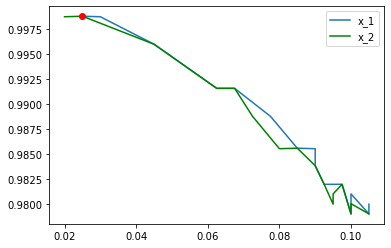

In [71]:
import pylab as pl

from artap.problem import Problem
from artap.results import Results
from artap.algorithm_scipy import ScipyOpt

class ArtapProblem(Problem):
    """
    The solution of this problem needs to find the minimum of a one parametered (x_1) goal function.
    The problem solved, by the Nelder-Mead method, therefore an initial value has to be defined, anyway it is set to 0.
    """

    def set(self):
        self.parameters = [{'name': 'x_1', 'initial_value': 0.1, 'bounds': [0.0, 0.9]},
                           {'name': 'x_2', 'initial_value': 0.1, 'bounds': [0.0, 0.9]}]
        self.costs = [{'name': 'F_1', 'criteria':'maximize'}]

    def evaluate(self, individual):
        # The variable individual.vector contains vector of particular values of parameters
        x = individual.vector

        # the goal function
        F1 = 1 - x[0]**2 - x[1]**2

        # the evaluate function should give back a list of the calculated objective values, following the defined
        # order in set(Problem) in this case --> ['F1']
        return [F1]

# Optimization with Nelder-Mead
problem = ArtapProblem()

# set the optimization method
algorithm = ScipyOpt(problem)
algorithm.options['algorithm'] = 'Nelder-Mead'
algorithm.options['tol'] = 1e-3

# perform the optimization
algorithm.run()
results = Results(problem)
optimum = results.find_optimum(0)
print('The optimal value of the parameter:{}.'.format(optimum.vector))
print('The optimal value of the goal function:{}.'.format(optimum.costs[0]))
table = results.goal_on_parameter('x_1', 'F_1', sorted=True)
pl.plot(table [0], table[1], label='x_1')
table = results.goal_on_parameter('x_2', 'F_1', sorted=True)
pl.plot(table [0], table[1], 'g', label='x_2')
pl.plot(optimum.vector[0], optimum.costs[0],'or')
pl.legend()
